In [73]:
import pandas as pd
import numpy as np
import os
os.chdir('C:\\0-ece204\\pr4')
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [74]:
merged = pd.read_csv('merged.csv')
merged.columns

Index(['patient_id', 'type', 'age_at_initial_pathologic_diagnosis', 'gender',
       'race', 'ajcc_pathologic_tumor_stage', 'histological_type',
       'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time',
       'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction',
       'Sample ID', 'Diagnosis Age',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code',
       'American Joint Committee on Cancer Publication Version Type',
       'Aneuploidy Score', 'Buffa Hypoxia Score', 'Cancer Type',
       'TCGA PanCanAtlas Cancer Type Acronym', 'Cancer Type Detailed',
       'Last Communication Contact from Initial Pathologic Diagnosis Date',
       'Birth from Initial Pathologic Diagnosis Date',
       'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
       'Disease Free (Months)', 'Disease Free Status',
       'Months of disease-specific survival',
       'Disease-specific Survival status', 'Ethnicity Category',
      

In [75]:
df = merged[['tumor_status','Subtype']]
df = df.dropna()
df = df[df['tumor_status'] != '[Discrepancy]']
df = pd.get_dummies(df)
df

,tumor_status_TUMOR FREE,tumor_status_WITH TUMOR,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
490,0,1,0,1
491,0,1,0,1
492,1,0,1,0
493,1,0,0,1


Phi coefficient: 0.07904529699035905
P-value: 0.08966367435388384


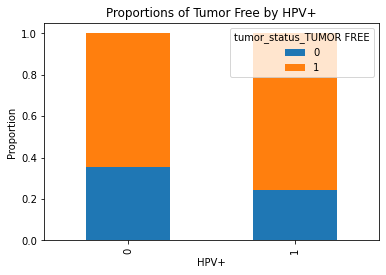

In [76]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['tumor_status_TUMOR FREE'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)
proportions = df.groupby('Subtype_HNSC_HPV+')['tumor_status_TUMOR FREE'].value_counts(normalize=True).unstack()
proportions.plot(kind='bar', stacked=True)
plt.xlabel('HPV+')
plt.ylabel('Proportion')
plt.title('Proportions of Tumor Free by HPV+')
plt.show()

In [77]:
df = merged[['vital_status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)
df

,vital_status_Alive,vital_status_Dead,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
490,0,1,0,1
491,0,1,0,1
492,1,0,1,0
493,0,1,0,1


Phi coefficient: 0.15497842704418438
P-value: 0.0006260369311418409


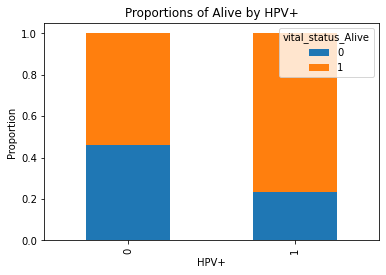

In [78]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['vital_status_Alive'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)
proportions = df.groupby('Subtype_HNSC_HPV+')['vital_status_Alive'].value_counts(normalize=True).unstack()
proportions.plot(kind='bar', stacked=True)
plt.xlabel('HPV+')
plt.ylabel('Proportion')
plt.title('Proportions of Alive by HPV+')
plt.show()

In [79]:
df = merged[['Disease Free Status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)
df

,Disease Free Status_0:DiseaseFree,Disease Free Status_1:Recurred/Progressed,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
7,0,1,1,0
9,1,0,0,1
14,1,0,1,0
19,1,0,0,1
23,0,1,0,1
...,...,...,...,...
464,1,0,1,0
468,1,0,0,1
475,1,0,0,1
493,1,0,0,1


Phi coefficient: 0.1170221375829033
P-value: 0.20366255950523302


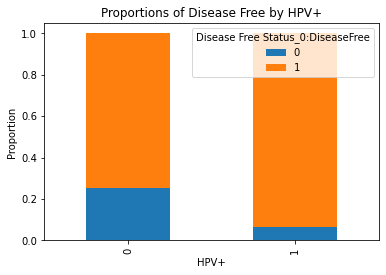

In [80]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['Disease Free Status_0:DiseaseFree'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)
proportions = df.groupby('Subtype_HNSC_HPV+')['Disease Free Status_0:DiseaseFree'].value_counts(normalize=True).unstack()
proportions.plot(kind='bar', stacked=True)
plt.xlabel('HPV+')
plt.ylabel('Proportion')
plt.title('Proportions of Disease Free by HPV+')
plt.show()

In [81]:
df = merged[['Disease-specific Survival status','Subtype']]
df = df.dropna()
df = pd.get_dummies(df)
df

,Disease-specific Survival status_0:ALIVE OR DEAD TUMOR FREE,Disease-specific Survival status_1:DEAD WITH TUMOR,Subtype_HNSC_HPV+,Subtype_HNSC_HPV-
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
490,0,1,0,1
491,0,1,0,1
492,1,0,1,0
493,1,0,0,1


Phi coefficient: 0.08629189959005065
P-value: 0.0630577040783995


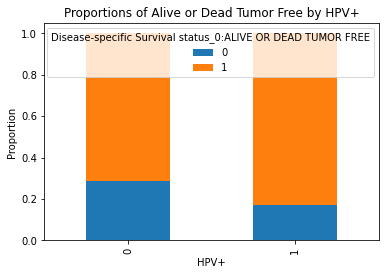

In [82]:
contingency_table = pd.crosstab(df['Subtype_HNSC_HPV+'], df['Disease-specific Survival status_0:ALIVE OR DEAD TUMOR FREE'])
chi2,p_value,_,_ = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2/(len(df)*min(contingency_table.shape[0]-1,contingency_table.shape[1]-1)))
print("Phi coefficient:", phi_coefficient)
print("P-value:", p_value)
proportions = df.groupby('Subtype_HNSC_HPV+')['Disease-specific Survival status_0:ALIVE OR DEAD TUMOR FREE'].value_counts(normalize=True).unstack()
proportions.plot(kind='bar', stacked=True)
plt.xlabel('HPV+')
plt.ylabel('Proportion')
plt.title('Proportions of Alive or Dead Tumor Free by HPV+')
plt.show()